In [58]:
import os
import numpy as np
import mne
import pickle
%matplotlib inline
mne.utils.set_config('MNE_USE_CUDA', 'true')  
mne.cuda.init_cuda(verbose=True)

In [59]:
#Load transformed data from saved file into list
data=pickle.load(open('pickled/OpenBCISession_2020-02-06_11-26-48-TWO', 'rb'))

In [60]:
#Naming system for blocks into integers
bloc={
    "sync":1,
    "baseline":2,
    "stressor":3,
    "survey":4,
    "rest":5,
    "slowBreath":6,
    "paced":7
}

def createMNEObj(data, name='Empty'):
    #Create Metadata
    
    sampling_rate = 125
    channel_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4',
                    'time', 'bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate', 'segment_indices1', 'segment_indices2', 'block']
    channel_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
                     'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'stim']
    n_channels = len(channel_types)
    info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
    info['description'] = name
    print(info)
    transformed = []
    start=-1.0
    
    for i in range(len(data)):
        add=[]
        add=data[i][1:17]
#         print(data[i][19].keys())
        if start==-1:
            start=data[i][18].hour*3600 + data[i][18].minute*60 + data[i][18].second + data[i][18].microsecond/1000
            add.append(0.0)
        else:
            tim=data[i][18].hour*3600 + data[i][18].minute*60 + data[i][18].second + data[i][18].microsecond/1000
            add.append(tim-start)
#         add.append(str(data[i][18].hour)+':'+str(data[i][18].minute)+':'+str(data[i][18].second)+':'+str(int(data[i][18].microsecond/1000)))
#         try:
        add.append(data[i][19]['bpm'])
#         except Exception as e: 
#             print(e, i)
#             print(data[i][19])
#             print(len(data))
        
        add.append(data[i][19]['ibi'])
        add.append(data[i][19]['sdnn'])
        add.append(data[i][19]['sdsd'])
        add.append(data[i][19]['rmssd'])
        add.append(data[i][19]['pnn20'])
        add.append(data[i][19]['pnn50'])
        add.append(data[i][19]['hr_mad'])
        add.append(data[i][19]['sd1'])
        add.append(data[i][19]['sd2'])
        add.append(data[i][19]['s'])
        add.append(data[i][19]['sd1/sd2'])
        add.append(data[i][19]['breathingrate'])
        add.append(data[i][19]['segment_indices'][0])
        add.append(data[i][19]['segment_indices'][1])
        add.append(bloc[data[i][20]])
        transformed.append(np.array(add))
    
    transformed=np.array(transformed)
    print(transformed[0])
    #have to convert rows to columns to fit MNE structure
    transformed=transformed.transpose()
    print(transformed[0], transformed[1], transformed[2], transformed[3])
    print(len(transformed[0]))
    loaded=mne.io.RawArray(transformed, info)
    return loaded

In [61]:
raw=createMNEObj(data)

<ipython-input-60-f7810211a598>:21: RuntimeWarning: 2 channel names are too long, have been truncated to 15 characters:
['segment_indices1', 'segment_indices2']
  info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
<ipython-input-60-f7810211a598>:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'segment_indices'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Warning: converting a masked element to nan.


<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, ...
    chs : list | 33 items (EEG: 16, MISC: 16, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 5 items
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 62.5 Hz
    meas_date : NoneType | unspecified
    nchan : int | 33
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 125.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_nam

In [62]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, ...
    chs : list | 33 items (EEG: 16, MISC: 16, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 5 items
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 62.5 Hz
    meas_date : NoneType | unspecified
    nchan : int | 33
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 125.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_nam

In [32]:
raw.crop(0,60).load_data() #crop data for testing: 60 secs

<RawArray  |  None, n_channels x n_times : 33 x 7501 (60.0 sec), ~2.0 MB, data loaded>

In [33]:
isinstance(raw.info, dict)

True

In [34]:
raw.info['sfreq']

125.0

In [20]:
raw.info['bads'] #marked as bad

[]

In [35]:
raw.ch_names

['Fp1',
 'Fp2',
 'C3',
 'C4',
 'P7',
 'P8',
 'O1',
 'O2',
 'F7',
 'F8',
 'F3',
 'F4',
 'T7',
 'T8',
 'P3',
 'P4',
 'time',
 'bpm',
 'ibi',
 'sdnn',
 'sdsd',
 'rmssd',
 'pnn20',
 'pnn50',
 'hr_mad',
 'sd1',
 'sd2',
 's',
 'sd1/sd2',
 'breathingrate',
 'segment_indic-0',
 'segment_indic-1',
 'block']

In [63]:
events = mne.find_events(raw, initial_event=True)

19 events found
Event IDs: [1 2 3 4 5 6 7]


In [64]:
bloc

{'sync': 1,
 'baseline': 2,
 'stressor': 3,
 'survey': 4,
 'rest': 5,
 'slowBreath': 6,
 'paced': 7}

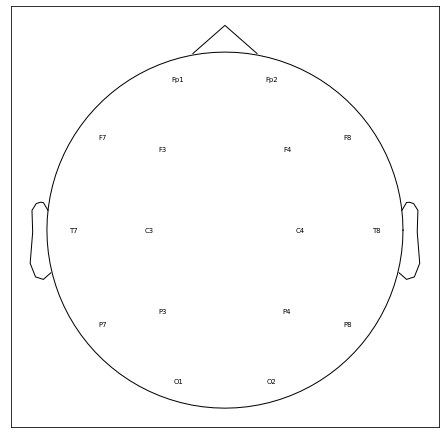

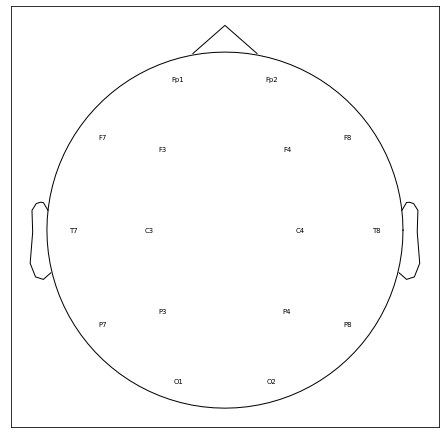

In [67]:
layout = mne.channels.read_layout('cap', path='./')
layout.plot()  # same result as: mne.viz.plot_layout(biosemi_layout)

In [74]:
cap_layout = mne.channels.make_standard_montage('cap')

ValueError: Could not find the montage cap. Please provide one among: dict_keys(['EGI_256', 'easycap-M1', 'easycap-M10', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'biosemi128', 'biosemi16', 'biosemi160', 'biosemi256', 'biosemi32', 'biosemi64', 'mgh60', 'mgh70', 'standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed'])

In [70]:
raw.set_montage(layout, raise_if_subset=False)

<ipython-input-70-2be9c3a48f6b>:1: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  raw.set_montage(layout, raise_if_subset=False)


TypeError: Montage must be a 'Montage', 'DigMontage', 'str' or 'None' instead of '<class 'mne.channels.layout.Layout'>'.

In [69]:
raw.plot_sensors(kind='topomap', ch_type='eeg');

RuntimeError: No valid channel positions found

In [39]:
events = mne.find_events(raw, initial_event=True)

2 events found
Event IDs: [1 2]


In [50]:
filter_params = mne.filter.create_filter(raw.get_data(), raw.info['sfreq'],
                                         l_freq=0.2, h_freq=55)

Setting up band-pass filter from 0.2 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 58.75 Hz)
- Filter length: 2063 samples (16.504 sec)



In [51]:
filter_params

array([2.21291546e-05, 2.22075070e-05, 2.22866428e-05, ...,
       2.22866428e-05, 2.22075070e-05, 2.21291546e-05])

In [48]:
raw_highpass = raw.copy().filter(filter_params)
# fig = raw_highpass.plot(duration=60, order=mag_channels, proj=False,
#                             n_channels=len(mag_channels), remove_dc=False)

TypeError: filter() missing 1 required positional argument: 'h_freq'

In [ ]:
#to_drop = ['1', '2' ... ] 
#raw.drop_channels #use this to drop unused channels 

Effective window size : 16.384 (s)


<ipython-input-36-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


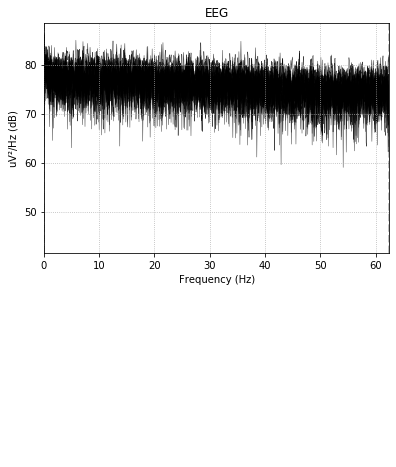

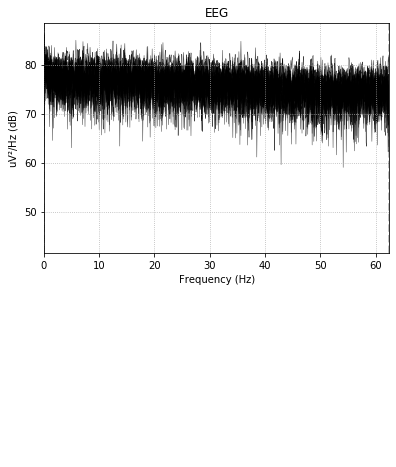

In [36]:
raw.plot_psd()

In [24]:
events = mne.find_events(raw, initial_event = False) #add events manually using the 'stim_channel' parameter

ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

In [12]:
ssp_projectors = raw.info['projs']
raw.del_proj()


<RawArray  |  None, n_channels x n_times : 33 x 7501 (60.0 sec), ~2.0 MB, data loaded>

In [93]:
type(raw[0][0][0][0])

numpy.float64

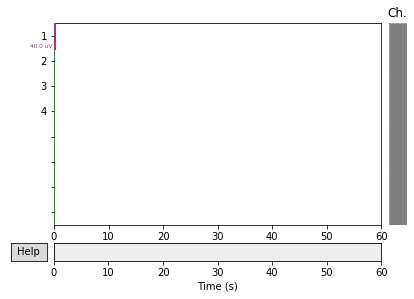

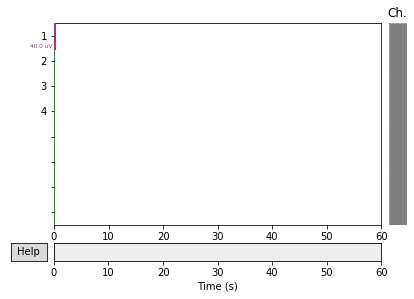

In [15]:
mag_channels = mne.pick_types(raw.info, eeg=True)
raw.plot(duration=60, order=[0, 1, 2, 3], n_channels=8,
         remove_dc=False)


Effective window size : 3.410 (s)


ImportError: cannot import name 'is_pydata_spmatrix' from 'scipy.sparse.sputils' (/home/sean/anaconda3/lib/python3.7/site-packages/scipy/sparse/sputils.py)

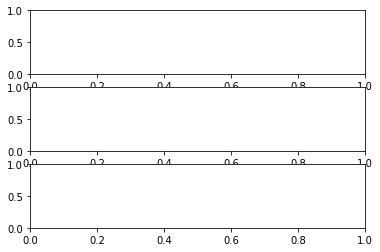

In [20]:
fig = raw.plot_psd(tmax=np.inf, fmax=250, average=True)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[:2]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)
